In [1]:
base_dir = '/media/ente/M2/2018 - 11 - sorted data'
class_names = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax' ]
export_dir= '/home/ente/Dropbox/THESIS/Code/Transfer_InceptionV3/Export'

#preprocessing
validation_split = 0.2
#color_channels = 3
color_mode='rgb'
#color_mode='grayscale'
target_width = target_height = 299
target_size = (target_height, target_width)

#layers + optimizer
dropout=0.7
batch_size = 32
epochs1 = 10
epochs2 = 100
dense_units=1024
class_mode = 'categorical'
import keras_metrics
metrics= ['categorical_accuracy', keras_metrics.precision(), keras_metrics.recall()]

#class dirs
import os
ate_dir = os.path.join(base_dir, class_names[0])
car_dir = os.path.join(base_dir, class_names[1])
con_dir = os.path.join(base_dir, class_names[2])
ede_dir = os.path.join(base_dir, class_names[3])
eff_dir = os.path.join(base_dir, class_names[4])
emp_dir = os.path.join(base_dir, class_names[5])
fib_dir = os.path.join(base_dir, class_names[6])
her_dir = os.path.join(base_dir, class_names[7])
inf_dir = os.path.join(base_dir, class_names[8])
mas_dir = os.path.join(base_dir, class_names[9])
nof_dir = os.path.join(base_dir, class_names[10])
nod_dir = os.path.join(base_dir, class_names[11])
ple_dir = os.path.join(base_dir, class_names[12])
pne_dir = os.path.join(base_dir, class_names[13])
pn2_dir = os.path.join(base_dir, class_names[14])
#filenames
ate_fnames = os.listdir(ate_dir)
car_fnames = os.listdir(car_dir)
con_fnames = os.listdir(con_dir)
ede_fnames = os.listdir(ede_dir)
eff_fnames = os.listdir(eff_dir)
emp_fnames = os.listdir(emp_dir)
fib_fnames = os.listdir(fib_dir)
her_fnames = os.listdir(her_dir)
inf_fnames = os.listdir(inf_dir)
mas_fnames = os.listdir(mas_dir)
nof_fnames = os.listdir(nof_dir)
nod_fnames = os.listdir(nod_dir)
ple_fnames = os.listdir(ple_dir)
pne_fnames = os.listdir(pne_dir)
pn2_fnames = os.listdir(pn2_dir)
#print (train_ate_fnames[:10])
#train_car_fnames.sort()

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
datagen = ImageDataGenerator(
    rescale=1./255,
    samplewise_center=True,
    samplewise_std_normalization=True,
    validation_split=validation_split) # set validation split

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode=class_mode,
    color_mode=color_mode, 
    subset='training') # set as training data

validation_generator = datagen.flow_from_directory(
    base_dir, # same directory as training data
    target_size=target_size,
    batch_size=batch_size,
    class_mode=class_mode, #Determines the type of label arrays that are returned:"categorical" will be 2D one-hot encoded labels,
    color_mode=color_mode, 
    subset='validation') # set as validation data

print ('total Atelectasis images:       ', len(os.listdir(ate_dir))) 
print ('total Cardiomegaly images:      ', len(os.listdir(car_dir))) 
print ('total Consolidation images:     ', len(os.listdir(con_dir))) 
print ('total Edema images:             ', len(os.listdir(ede_dir))) 
print ('total Effusion images:          ', len(os.listdir(eff_dir))) 
print ('total Emphysema images:         ', len(os.listdir(emp_dir))) 
print ('total Fibrosis images:          ', len(os.listdir(fib_dir))) 
print ('total Hernia images:            ', len(os.listdir(her_dir))) 
print ('total Infiltration images:      ', len(os.listdir(inf_dir))) 
print ('total Mass images:              ', len(os.listdir(mas_dir))) 
print ('total No_Finding images:        ', len(os.listdir(nof_dir))) 
print ('total Nodule images:            ', len(os.listdir(nod_dir))) 
print ('total Pleural_Thickening images:', len(os.listdir(ple_dir))) 
print ('total Pneumonia images:         ', len(os.listdir(pne_dir))) 
print ('total Pneumothorax images:      ', len(os.listdir(pn2_dir))) 

from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras import backend as K

# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(dense_units, activation='relu')(x)
x = Dropout(dropout)(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(len(class_names), activation = 'softmax') (x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=metrics)
model.summary()
# train the model on the new data for a few epochs

Using TensorFlow backend.


Found 34283 images belonging to 15 classes.
Found 8564 images belonging to 15 classes.
total Atelectasis images:        2015
total Cardiomegaly images:       464
total Consolidation images:      633
total Edema images:              310
total Effusion images:           1804
total Emphysema images:          461
total Fibrosis images:           366
total Hernia images:             53
total Infiltration images:       4640
total Mass images:               1043
total No_Finding images:         28000
total Nodule images:             1273
total Pleural_Thickening images: 525
total Pneumonia images:          161
total Pneumothorax images:       1099
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
______________________________________________________

In [2]:
history1=model.fit_generator(    
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    class_weight = 'balanced',
    epochs = epochs1)

Epoch 1/10
1071/1071 [==============================] - 650s 607ms/step - loss: 1.7626 - categorical_accuracy: 0.6465 - precision: 0.2000 - recall: 6.2150e-04 - val_loss: 1.4804 - val_categorical_accuracy: 0.6543 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
1071/1071 [==============================] - 643s 600ms/step - loss: 1.5097 - categorical_accuracy: 0.6535 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.4194 - val_categorical_accuracy: 0.6534 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
1071/1071 [==============================] - 644s 602ms/step - loss: 1.4730 - categorical_accuracy: 0.6534 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.4188 - val_categorical_accuracy: 0.6537 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
1071/1071 [==============================] - 641s 599ms/step - loss: 1.4508 - categorical_accuracy: 0.6533 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.6805 - val_catego

## Evaluate Pre-Training

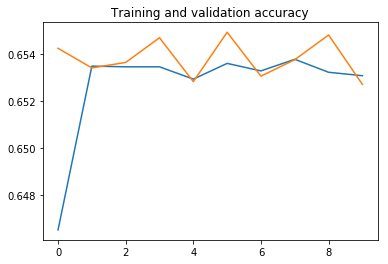

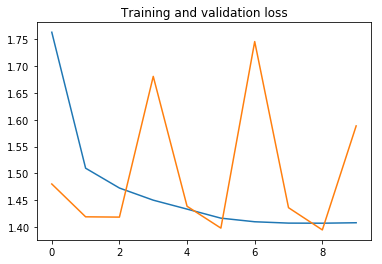

In [10]:
from matplotlib import pyplot

pyplot.plot(history1.history['categorical_accuracy'])
pyplot.plot(history1.history['val_categorical_accuracy'])
pyplot.title('Training and validation accuracy')
pyplot.show()

pyplot.plot(history1.history['loss'])
pyplot.plot(history1.history['val_loss'])
pyplot.title('Training and validation loss')
pyplot.show()

## Further Improving Accuracy with Fine-Tuning

In our feature-extraction experiment, we only tried adding two classification layers on top of an Inception V3 layer. The weights of the pretrained network were not updated during training. One way to increase performance even further is to "fine-tune" the weights of the top layers of the pretrained model alongside the training of the top-level classifier. A couple of important notes on fine-tuning:

- **Fine-tuning should only be attempted *after* you have trained the top-level classifier with the pretrained model set to non-trainable**. If you add a randomly initialized classifier on top of a pretrained model and attempt to train all layers jointly, the magnitude of the gradient updates will be too large (due to the random weights from the classifier), and your pretrained model will just forget everything it has learned.
- Additionally, we **fine-tune only the *top layers* of the pre-trained model** rather than all layers of the pretrained model because, in a convnet, the higher up a layer is, the more specialized it is. The first few layers in a convnet learn very simple and generic features, which generalize to almost all types of images. But as you go higher up, the features are increasingly specific to the dataset that the model is trained on. The goal of fine-tuning is to adapt these specialized features to work with the new dataset.

All we need to do to implement fine-tuning is to set the top layers of Inception V3 to be trainable, recompile the model (necessary for these changes to take effect), and resume training. Let's unfreeze all layers belonging to the `mixed7` module—i.e., all layers found after `mixed6`—and recompile the model:

In [14]:
# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0003, momentum=0.9), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.summary()
# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
history2=model.fit_generator(    
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    class_weight = 'balanced',
    epochs = epochs2)

0 input_1
1 conv2d_1
2 batch_normalization_1
3 activation_1
4 conv2d_2
5 batch_normalization_2
6 activation_2
7 conv2d_3
8 batch_normalization_3
9 activation_3
10 max_pooling2d_1
11 conv2d_4
12 batch_normalization_4
13 activation_4
14 conv2d_5
15 batch_normalization_5
16 activation_5
17 max_pooling2d_2
18 conv2d_9
19 batch_normalization_9
20 activation_9
21 conv2d_7
22 conv2d_10
23 batch_normalization_7
24 batch_normalization_10
25 activation_7
26 activation_10
27 average_pooling2d_1
28 conv2d_6
29 conv2d_8
30 conv2d_11
31 conv2d_12
32 batch_normalization_6
33 batch_normalization_8
34 batch_normalization_11
35 batch_normalization_12
36 activation_6
37 activation_8
38 activation_11
39 activation_12
40 mixed0
41 conv2d_16
42 batch_normalization_16
43 activation_16
44 conv2d_14
45 conv2d_17
46 batch_normalization_14
47 batch_normalization_17
48 activation_14
49 activation_17
50 average_pooling2d_2
51 conv2d_13
52 conv2d_15
53 conv2d_18
54 conv2d_19
55 batch_normalization_13
56 batch_norma

Epoch 1/100
1071/1071 [==============================] - 658s 615ms/step - loss: 1.3936 - categorical_accuracy: 0.6539 - val_loss: 1.4207 - val_categorical_accuracy: 0.6493
Epoch 2/100
1071/1071 [==============================] - 642s 599ms/step - loss: 1.3925 - categorical_accuracy: 0.6529 - val_loss: 1.4045 - val_categorical_accuracy: 0.6562
Epoch 3/100
1071/1071 [==============================] - 644s 601ms/step - loss: 1.3892 - categorical_accuracy: 0.6532 - val_loss: 1.4066 - val_categorical_accuracy: 0.6568
Epoch 4/100
1071/1071 [==============================] - 645s 602ms/step - loss: 1.3790 - categorical_accuracy: 0.6547 - val_loss: 1.4621 - val_categorical_accuracy: 0.6506
Epoch 5/100
1071/1071 [==============================] - 644s 601ms/step - loss: 1.3796 - categorical_accuracy: 0.6525 - val_loss: 1.4478 - val_categorical_accuracy: 0.6555
Epoch 6/100
1071/1071 [==============================] - 644s 601ms/step - loss: 1.3776 - categorical_accuracy: 0.6531 - val_loss: 1.47

KeyboardInterrupt: 

## Evaluate Fine-Tuning

In [ ]:
#Confution Matrix and Classification Report
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict_generator(validation_generator, validation_generator.samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=class_names))

In [ ]:
from matplotlib import pyplot

pyplot.plot(history2.history['categorical_accuracy'])
pyplot.plot(history2.history['val_categorical_accuracy'])
pyplot.title('Training and validation accuracy')
pyplot.show()

pyplot.plot(history2.history['loss'])
pyplot.plot(history2.history['val_loss'])
pyplot.title('Training and validation loss')
pyplot.show()

In [ ]:
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(base_model.input, successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(ate_dir, f) for f in ate_fnames]
dog_img_files = [os.path.join(car_dir, f) for f in car_fnames]
img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=target_size)  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    pyplot.figure(figsize=(scale * n_features, scale))
    pyplot.title(layer_name)
    pyplot.grid(False)
    pyplot.imshow(display_grid, aspect='auto', cmap='viridis')